In [1]:
import ROOT
ROOT.gSystem.Load('ModGaus_cxx.so')
ROOT.gSystem.Load('ModGaus01_cxx.so')
ROOT.gSystem.Load('ModGaus10_cxx.so')
ROOT.gSystem.Load('ModGaus11_cxx.so')
ROOT.gSystem.Load('ModGaus21_cxx.so')
ROOT.TGaxis.SetMaxDigits(3)
from IPython.display import IFrame

Welcome to JupyROOT 6.12/07


[#1] INFO:Eval -- RooTreeDataStore::loadValues(Inclusive) Ignored 12682 out of range events
[#1] INFO:Eval -- RooRealVar::setRange(llphoton_m) new range named 'full' created with bounds [100,180]
[#1] INFO:Eval -- RooRealVar::setRange(llphoton_m) new range named 'left' created with bounds [100,120]
[#1] INFO:Eval -- RooRealVar::setRange(llphoton_m) new range named 'right' created with bounds [132,180]
[#1] INFO:NumericIntegration -- RooRealIntegral::init(background_Int[llphoton_m]) using numeric integrator RooIntegrator1D to calculate Int(llphoton_m)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **   46 **SET PRINT           1
 **********
 **********
 **   47 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 #nu_{L}      2.50000e+00  1.00000e-01    0.00000e+00  5.00000e+00
     2 #sigma_{0}   1.00000e+01  1.00000e+00    1.00000e+00  4.00000e+01
     3 #sigma_{1}   2.05000e+01

Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


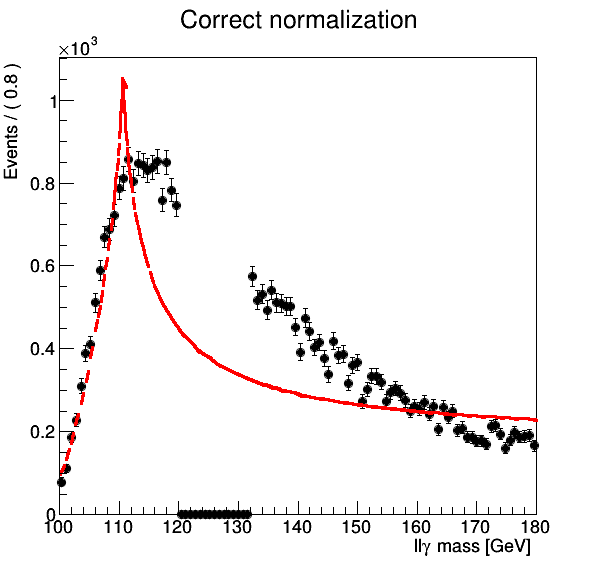

In [19]:
defaults = [120, 2.5, 0, 10, 10, 50, 0, 0, 50]
xlow = 100
xhigh = 180
fitType = "ModGaus01"
category = "Inclusive"

m = ROOT.RooRealVar("llphoton_m", "ll#gamma mass [GeV]", xlow, xhigh)
m0 = ROOT.RooRealVar("m_{0}", "mass peak value [GeV]", defaults[0], 105, 145)
m0.setError(1.0)
vl = ROOT.RooRealVar("#nu_{L}", "low-end power", defaults[1], 0, 5)
vl.setError(0.1)
vr = ROOT.RooRealVar("#Delta#nu", "power range", defaults[2], -5, 5)
vr.setError(0.1)
s0 = ROOT.RooRealVar("#sigma_{0}", "peak width", defaults[3], 1, 40)
s0.setError(1.0)
sl = ROOT.RooRealVar("#sigma_{L}", "low-end width", defaults[4], 1, 40)
sl.setError(1.0)
sh = ROOT.RooRealVar("#sigma_{H}", "high-end width", defaults[5], 20, 100)
sh.setError(1.0)
s1 = ROOT.RooRealVar("#sigma_{1}", "1st order width", defaults[6], 1, 40)
s1.setError(1.0)
s2 = ROOT.RooRealVar("#sigma_{2}", "2nd order width", defaults[7], -50, 50)
s2.setError(1.0)
v0 = ROOT.RooRealVar("#nu_{0}", "0th order power", 2.5, 0, 5)
v0.setError(0.1)
v1 = ROOT.RooRealVar("#nu_{1}", "1st order power", 2.5, 0, 5)
v1.setError(0.1)

if fitType == "ModGaus21":
    background = ROOT.ModGaus21("background", "G_{2, 1}", m, m0, vl, vr, s0, s1, s2)
elif fitType == "ModGaus11":
    background = ROOT.ModGaus11("background", "G_{1, 1}", m, m0, vl, vr, s0, s1)
elif fitType == "ModGaus10":
    background = ROOT.ModGaus10("background", "G_{1, 0}", m, m0, vl, vr, s0)
elif fitType == "ModGaus01":
    background = ROOT.ModGaus01("background", "G_{0, 1}", m, m0, vl, s0, s1)
else:
    background = ROOT.ModGaus("background", "G_{M}", m, m0, vl, vr, s0, sl, sh)

inpath = "Data.root"
infile = ROOT.TFile(inpath)
tree = infile.Get("opttree")

data = ROOT.RooDataSet(category, category, ROOT.RooArgSet(m), ROOT.RooFit.Import(tree))

m.setRange("full", 100, 180)
m.setRange("left", 100, 120)
m.setRange("right", 132, 180)
 
blindedData1 = data.reduce(ROOT.RooFit.CutRange("left"))
blindedData2 = data.reduce(ROOT.RooFit.CutRange("right"))

blindedData = blindedData2.Clone()
blindedData.append(blindedData1)

fitResult = background.fitTo(blindedData)
#fitResult = background.fitTo(data)

canvas = ROOT.TCanvas("canvas", "canvas", 600, 600)

plotFrame = m.frame(ROOT.RooFit.Title("Correct normalization"))

blindedData.plotOn(plotFrame)

background.plotOn(plotFrame, ROOT.RooFit.LineColor(ROOT.kRed), ROOT.RooFit.Range("full"), \
                  ROOT.RooFit.NormRange("full"), ROOT.RooFit.LineStyle(10))

plotFrame.Draw()

canvas.Draw()